# Data Loading

In [2]:
# Load data sets
import os
import pandas as pd

# Specify the base directory, subdirectory, and filename
base_dir = ''  # Replace with your actual base directory
subdir = ''  # Replace with your subdirectory name
filename = 'imdb_indian_movies.csv'

# Construct the full file path
file_path = os.path.join(base_dir, subdir, filename)

try:
    df = pd.read_csv(file_path)
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print(f"Error: '{file_path}' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

,Unnamed: 0,movie_id,movie_name,year,genre,overview,director,cast
0,0,tt15354916,Jawan,2023,"Action, Thriller",A high-octane action thriller which outlines t...,Atlee,"Shah Rukh Khan, Nayanthara, Vijay Sethupathi, ..."
1,1,tt15748830,Jaane Jaan,2023,"Crime, Drama, Mystery",A single mother and her daughter who commit a ...,Sujoy Ghosh,"Kareena Kapoor, Jaideep Ahlawat, Vijay Varma, ..."
2,2,tt11663228,Jailer,2023,"Action, Comedy, Crime",A retired jailer goes on a manhunt to find his...,Nelson Dilipkumar,"Rajinikanth, Mohanlal, Shivarajkumar, Jackie S..."
3,3,tt14993250,Rocky Aur Rani Kii Prem Kahaani,2023,"Comedy, Drama, Family",Flamboyant Punjabi Rocky and intellectual Beng...,Karan Johar,"Ranveer Singh, Alia Bhatt, Dharmendra, Shabana..."
4,4,tt15732324,OMG 2,2023,"Comedy, Drama",An unhappy civilian asks the court to mandate ...,Amit Rai,"Pankaj Tripathi, Akshay Kumar, Yami Gautam, Pa..."


(2199, 8)


# Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2199 non-null   int64 
 1   movie_id    2199 non-null   object
 2   movie_name  2199 non-null   object
 3   year        2134 non-null   object
 4   genre       2199 non-null   object
 5   overview    2199 non-null   object
 6   director    2199 non-null   object
 7   cast        2199 non-null   object
dtypes: int64(1), object(7)
memory usage: 137.6+ KB


In [4]:
# removed unnamed column from df_imdb dataframe
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.describe()

,movie_id,movie_name,year,genre,overview,director,cast
count,2199,2199,2134,2199,2199,2199,2199
unique,2199,2161,84,225,2120,1064,2178
top,tt15354916,Don,2023,"Action, Crime, Drama",Add a Plot,David Dhawan,"Mithun Chakraborty, Madhoo, Maya Alagh, Vijay ..."
freq,1,3,193,173,72,29,3


In [6]:
df.isnull().sum()

,0
movie_id,0
movie_name,0
year,65
genre,0
overview,0
director,0
cast,0


In [7]:
df.shape

(2199, 7)

In [8]:
def dataset_details(dataset):
    feature = []
    dtype = []
    unique =[]
    count = []
    missing_values=[]
    missing_percentage = []

    for column in df.columns :
        feature.append(column)
        dtype.append(df[column].dtype)
        unique.append(df[column].unique())
        count.append(len(df[column]))
        missing_values.append(df[column].isnull().sum())
        missing_percentage.append(round((df[column].isnull().sum()/len(df))*100 , 2))


    details = pd.DataFrame({
        'Feature' : feature ,
        'Type' : dtype ,
        'Count' : count ,
        'Unique' : unique ,
        "Missed Values" : missing_values,
        'Missed Percent%' : missing_percentage,

    })

    return details

In [9]:
dataset_details(df)

,Feature,Type,Count,Unique,Missed Values,Missed Percent%
0,movie_id,object,2199,"[tt15354916, tt15748830, tt11663228, tt1499325...",0,0.00
1,movie_name,object,2199,"[Jawan, Jaane Jaan, Jailer, Rocky Aur Rani Kii...",0,0.00
2,year,object,2199,"[2023, 2016, 2009, 2012, 2001, 2007, 2018, 202...",65,2.96
3,genre,object,2199,"[Action, Thriller, Crime, Drama, Mystery, Acti...",0,0.00
4,overview,object,2199,[A high-octane action thriller which outlines ...,0,0.00
5,director,object,2199,"[Atlee, Sujoy Ghosh, Nelson Dilipkumar, Karan ...",0,0.00
6,cast,object,2199,"[Shah Rukh Khan, Nayanthara, Vijay Sethupathi,...",0,0.00


In [10]:
df.duplicated().sum()

0

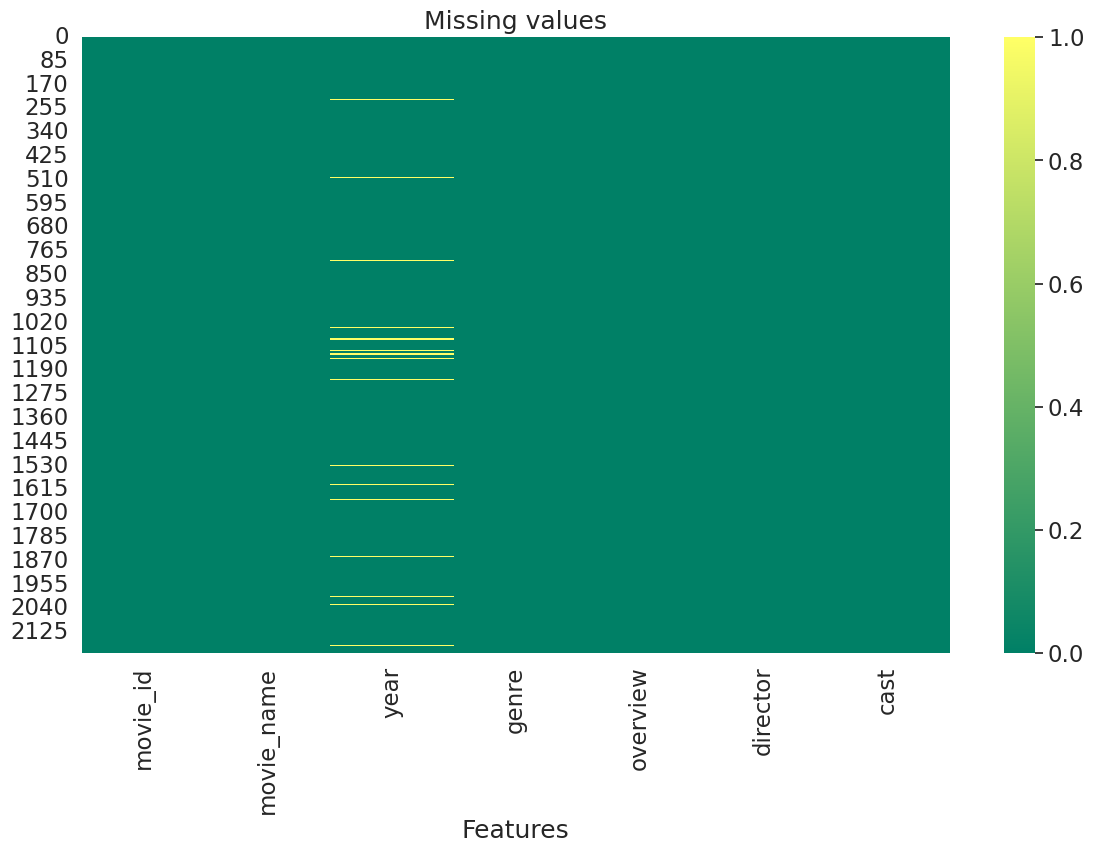

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid",font_scale=1.5)
plt.figure(figsize=(14,8))
sns.heatmap(df.isnull(),cmap="summer")
plt.xlabel('Features')
plt.title('Missing values')
plt.show()

# Data Cleaning

In [12]:
# Convert 'year' column in df_imdb to numeric, handling errors
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Handle missing values in 'year' column after conversion
df['year'] = df['year'].fillna(df['year'].median())

# Handle duplicates based on 'movie_name' and 'year'
df.drop_duplicates(subset=['movie_name', 'year'], keep='first', inplace=True)

display(df.head())

,movie_id,movie_name,year,genre,overview,director,cast
0,tt15354916,Jawan,2023.0,"Action, Thriller",A high-octane action thriller which outlines t...,Atlee,"Shah Rukh Khan, Nayanthara, Vijay Sethupathi, ..."
1,tt15748830,Jaane Jaan,2023.0,"Crime, Drama, Mystery",A single mother and her daughter who commit a ...,Sujoy Ghosh,"Kareena Kapoor, Jaideep Ahlawat, Vijay Varma, ..."
2,tt11663228,Jailer,2023.0,"Action, Comedy, Crime",A retired jailer goes on a manhunt to find his...,Nelson Dilipkumar,"Rajinikanth, Mohanlal, Shivarajkumar, Jackie S..."
3,tt14993250,Rocky Aur Rani Kii Prem Kahaani,2023.0,"Comedy, Drama, Family",Flamboyant Punjabi Rocky and intellectual Beng...,Karan Johar,"Ranveer Singh, Alia Bhatt, Dharmendra, Shabana..."
4,tt15732324,OMG 2,2023.0,"Comedy, Drama",An unhappy civilian asks the court to mandate ...,Amit Rai,"Pankaj Tripathi, Akshay Kumar, Yami Gautam, Pa..."


In [13]:
# Standardize movie titles
df['movie_name'] = df['movie_name'].str.lower().str.strip()

# Select merge columns
merge_columns = ['movie_name', 'year']

print(f"Merge columns selected: {merge_columns}")

Merge columns selected: ['movie_name', 'year']


In [14]:
df.to_csv('imdb_indian_movies-1.csv', index=False)